### Описание: 
Анализ данных вакансий HH.ru на примере data analyst и system analyst
### Цель проекта: 
Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков
### Исходные данные 
Данные получены из API HH.ru

### Гипотеза:
в ходе исследования данных о вакансиях Аналитиков данных(DA) и Системных аналитиков(SA) сформировать типовые портреты соисткателей согласно обозначенных треббований, выявить какие требуемые навыки являются общими, а какие различаются


#### 1. Предобработка данных.

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import style


In [237]:
da = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\Aналитика_hh_(da+sa)\vacancies_da.csv', sep=";", encoding='windows_1251')


In [238]:
sa = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\Aналитика_hh_(da+sa)\vacancies_sa.csv', sep=";",encoding='windows_1251') #, encoding='windows_1250'

In [239]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1801 non-null   int64  
 1   name                              1801 non-null   object 
 2   published_at                      1801 non-null   object 
 3   alternate_url                     1801 non-null   object 
 4   type                              1801 non-null   object 
 5   employer                          1801 non-null   object 
 6   department                        521 non-null    object 
 7   area                              1801 non-null   object 
 8   experience                        1801 non-null   object 
 9   key_skills                        1801 non-null   object 
 10  schedule                          1801 non-null   object 
 11  employment                        1801 non-null   object 
 12  descri

в датасете da всего 1801 запись с вакансиями. пропуски в столбцах department (работодатель), salary_from нижняя граница ЗП, salary_to верхняя граница ЗП, key_skills_from_key_skills_field - ключевые навыки, hard_skills_from_description - харды,soft_skills_from_description - софты. Полных дубликатов нет.

In [240]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1915 non-null   int64  
 1   name                              1915 non-null   object 
 2   published_at                      1915 non-null   object 
 3   alternate_url                     1915 non-null   object 
 4   type                              1915 non-null   object 
 5   employer                          1915 non-null   object 
 6   department                        361 non-null    object 
 7   area                              1915 non-null   object 
 8   experience                        1915 non-null   object 
 9   key_skills                        1915 non-null   object 
 10  schedule                          1915 non-null   object 
 11  employment                        1915 non-null   object 
 12  descri

In [241]:
da.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          1280
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1453
salary_to                           1573
salary_bin                             0
key_skills_from_key_skills_field     708
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64

In [242]:
sa.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          1554
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1559
salary_to                           1636
salary_bin                             0
key_skills_from_key_skills_field     641
hard_skills_from_description        1345
soft_skills_from_description         488
dtype: int64

In [243]:
da.duplicated().sum()

0

в датасете sa всего 1915 запись с вакансиями. пропуски в столбцах department (работодатель), salary_from нижняя граница ЗП, salary_to верхняя граница ЗП, key_skills_from_key_skills_field - ключевые навыки, hard_skills_from_description - харды,soft_skills_from_description - софты. Полных дубликатов нет.

приведем для датафреймов da и sa наименования по полям name employer area key_skills_from_key_skills_field по символам е/ё к единой форме и к нижнему регистру

In [246]:
# приведем для датафреймов da и sa наименования по полям name employer area key_skills_from_key_skills_field по символам е/ё к единой форм
da['name'] = da['name'].replace(['ё'], 'е', regex=True)
da['employer'] = da['employer'].replace(['ё'], 'е', regex=True)
da['area'] = da['area'].replace(['ё'], 'е', regex=True)
da['key_skills'] = da['key_skills'].replace(['ё'], 'е', regex=True)
da['key_skills_from_key_skills_field'] = da['key_skills_from_key_skills_field'].replace(['ё'], 'е', regex=True)

sa['name'] = sa['name'].replace(['ё'], 'е', regex=True)
sa['employer'] = sa['employer'].replace(['ё'], 'е', regex=True)
sa['area'] = sa['area'].replace(['ё'], 'е', regex=True)
sa['key_skills'] = sa['key_skills'].replace(['ё'], 'е', regex=True)
sa['key_skills_from_key_skills_field'] = sa['key_skills_from_key_skills_field'].replace(['ё'], 'е', regex=True)

In [247]:
# приведем для датафреймов da и sa наименования по полям name employer area по символам в нижний регистр к единой форм
da['name'] = da['name'].str.lower()
da['employer'] = da['employer'].str.lower()
da['area'] = da['area'].str.lower()
da['key_skills'] = da['key_skills'].str.lower()
da['key_skills_from_key_skills_field'] = da['key_skills_from_key_skills_field'].str.lower()


sa['name'] = sa['name'].str.lower()
sa['employer'] = sa['employer'].str.lower()
sa['area'] = sa['area'].str.lower()
sa['key_skills'] = sa['key_skills'].str.lower()
sa['key_skills_from_key_skills_field'] = sa['key_skills_from_key_skills_field'].str.lower()

In [248]:
#display(da[da.duplicated(['name', 'employer', 'area', 'experience', 'department', 'description_lemmatized'])])

In [249]:
display(da.head())

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,dns головной офис,NaN,владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"sql, power bi, python, субд",NaN,NaN
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,комус,NaN,москва,Junior (no experince),"['ms sql', 'работа с базами данных', 'ms excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"работа с базами данных, ms sql, ms excel",NaN,NaN
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,dns головной офис,NaN,владивосток,Junior+ (1-3 years),"['sql', 'power bi', 'субд', 'python', 'clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"sql, power bi, python, субд, bpmn, clickhouse",NaN,NaN
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,х5 group,"X5 GROUP, Центральный офис",москва,Junior+ (1-3 years),"['анализ данных', 'коммуникация', 'sql', 'ms o...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"ms office, sql, python, hadoop, нive, аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,лукойл,NaN,москва,Middle (3-6 years),['документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


<font color='blue'> дополним датафреймы полем с признаком исходного фрейма и бъединим два датафрейма da и sa в один для дальнейшего анализа 

In [251]:
da['prof'] = 'da'
#display(da.head())

In [252]:
sa['prof'] = 'sa'
#display(sa.head())

In [253]:
data= pd.concat([da, sa])

In [254]:
#data.info()

проверим наличие неявных дубликатов и приведем к единому наименованию клчевые скилы

In [256]:
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['ms '], '', regex=True)
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['rest api'], 'api', regex=True)
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['rest'], 'api', regex=True)
#data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].replace(['rest api', 'rest ', 'api', ' api'], 'rest api', regex=True)


In [257]:
data['key_skills_from_key_skills_field'].unique()
#display(data['key_skills'].unique())

array(['sql, power bi, python, субд',
       'работа с базами данных, sql, excel',
       'sql, power bi, python, субд, bpmn, clickhouse', ...,
       'vba, python, powershell, оптимизация бизнес процессов, системы управления базами данных, аналитический склад ума, разработка технических заданий, автоматизация бизнес-процессов, аналитическое мышление, sql',
       'idef, sql, uml, bpmn, разработка технических заданий, системный анализ, api, бизнес-анализ',
       '1с: бит финанс, 1с: предприятие, excel, project'], dtype=object)

In [258]:
#da['key_skills'].unique()

#### 2. Исследовательский анализ данных.

#### Выявление грейда требуемых специалистов

In [261]:
data['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

В наименованиях вакансий значительное количество уникальных наименований, тогда как по категории требуемы опыт всего 4: Junior (no experince), Junior+ (1-3 years), 'Middle (3-6 years','Senior (6+ years)

#### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик


<font color='blue'>  Проверим как распрделены вакансии для DA и SA

prof,da,sa
experience,,
Junior (no experince),142,86
Junior+ (1-3 years),1091,852
Middle (3-6 years),555,933
Senior (6+ years),13,44


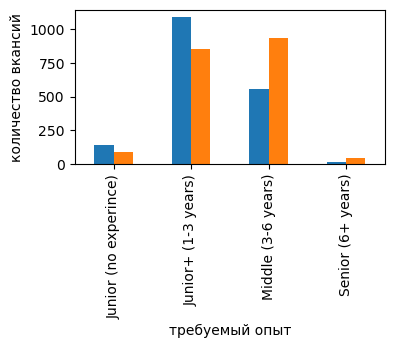

In [265]:
display(data.pivot_table(index='experience', columns= 'prof', values='id', aggfunc='count'))
data.pivot_table(index='experience', columns= 'prof', values='id', aggfunc='count').plot(y=['da','sa'], kind='bar', figsize=(4,2), legend = False)
plt.ylabel('количество вкансий')
plt.xlabel('требуемый опыт')
plt.show()

<font color='blue'> Проверим как распределены вакансии по грейду по отдельности для DA и SA

In [267]:
display(da.groupby('experience')['id'].count())
da.groupby('experience')['id'].count().transform(lambda x: 100 * x / x.sum())
#da.groupby('experience')['id'].count().transform(lambda x: 100 * x / x.sum()).plot(kind = 'pie')

experience
Junior (no experince)     142
Junior+ (1-3 years)      1091
Middle (3-6 years)        555
Senior (6+ years)          13
Name: id, dtype: int64

experience
Junior (no experince)     7.884509
Junior+ (1-3 years)      60.577457
Middle (3-6 years)       30.816213
Senior (6+ years)         0.721821
Name: id, dtype: float64

Из 1801 вакансии больше свего ищут категорию Junior+ (1-3 years) 1091 вкансия - 60.6%, 555 вакансий на Middle (3-6 years) или 30,8%, соскателей без опыт ищут реже - всего 142 вакансии для Junior (no experince) - 7,9%. Реже всего ищут Senior (6+ years) всего 13 вакансий или 0,7%. Скорее всего это обусловлено высокой степенью квалификации и такого рода сотрудников могут искать используя другие каналы на пример конференции, неформальные каналы, сообщества в соц.сетях. 


In [269]:
display(sa.groupby('experience')['id'].count())
sa.groupby('experience')['id'].count().transform(lambda x: 100 * x / x.sum())

experience
Junior (no experince)     86
Junior+ (1-3 years)      852
Middle (3-6 years)       933
Senior (6+ years)         44
Name: id, dtype: int64

experience
Junior (no experince)     4.490862
Junior+ (1-3 years)      44.490862
Middle (3-6 years)       48.720627
Senior (6+ years)         2.297650
Name: id, dtype: float64

По вакансиям sa из 1915 в отличии от da наибольшую долю в структуре вакансий занимают Middle (3-6 years) - 48,72% или 933 , 44,5% или 852 вакансии для Junior+ (1-3 years), для Junior (no experince) всего 86 вакансий или 4,5%. Senior (6+ years) ищут в 2,3% или 44 вакансиях.

#### Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. 

In [272]:
display(da.groupby('employer')['id'].count().sort_values(ascending = False).head(10))

employer
сбер                                     243
wildberries                               43
ozon                                      34
банк втб (пао)                            28
т1                                        26
магнит, розничная сеть                    24
мтс                                       22
okko                                      19
центральный банк российской федерации     16
яндекс                                    15
Name: id, dtype: int64

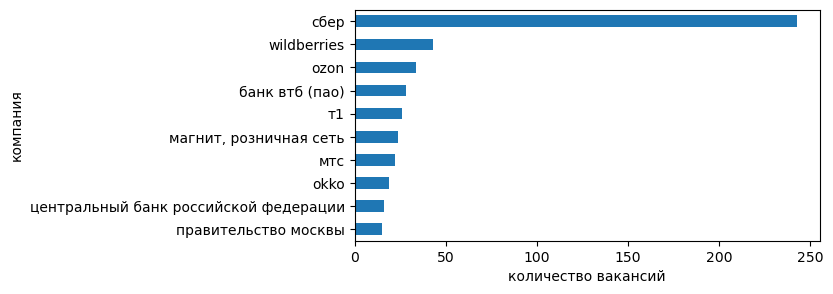

In [273]:
#display(da.pivot_table(index='employer', values='id', aggfunc='count').sort_values('id', ascending=False).head(10))
da.pivot_table(index='employer', values='id', aggfunc='count').sort_values('id', ascending= True).tail(10).plot(y = 'id', kind='barh', figsize=(6, 3), legend = False)
plt.ylabel('компания')
plt.xlabel('количество вакансий')
plt.show()

Лидерство по размещенным вакансия da занимает сбер с 243 вакансиями, с заметным отставанием wildberries - 43 и ozon 34 вакансии. В 5-ку лидер также вошли банк втб - 28 вакансий и ит-холдинг т1 - 26 вакансий.  

In [275]:
display(sa.groupby('employer')['id'].count().sort_values(ascending = False).head(10))

employer
сбер                                    95
т1                                      80
aston                                   65
совкомбанк технологии                   37
псб (пао «промсвязьбанк»)               30
selecty                                 22
т-банк                                  22
билайн                                  18
ростелеком информационные технологии    18
прикладные технологии                   16
Name: id, dtype: int64

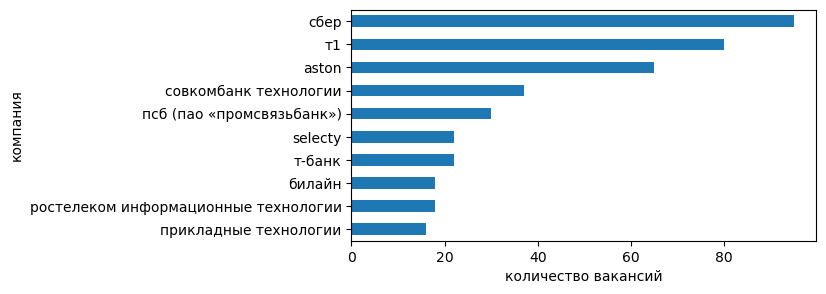

In [276]:
sa.pivot_table(index='employer', values='id', aggfunc='count').sort_values('id', ascending= True).tail(10).plot(y = 'id', kind='barh', figsize=(6, 3), legend = False)
plt.ylabel('компания')
plt.xlabel('количество вакансий')
plt.show()

Лидерство по размещенным вакансия как и у da в вакансиях sa занимает сбер с 95 вакансиями, за ним следует ит-холдинг т1 - 43, aston 34 вакансии в 5-ку лидеров также вошли совкомбанк технологии - 37, ПСБ (ПАО «Промсвязьбанк») - 30 вакансий. Распределение по ТОП-10 более "ровное" по сравнению с da, больше представлены банки или их дочерние структуры

##### Зарплатные предложения 

<font color='blue'> Проверим распределение обозначенных в вакансиях начальных зарплат по грейдам для DA и SA

prof,da,sa
experience,,
Junior (no experince),64702.0,65161.0
Junior+ (1-3 years),98010.0,131703.0
Middle (3-6 years),173963.0,207499.0
Senior (6+ years),156667.0,206698.0


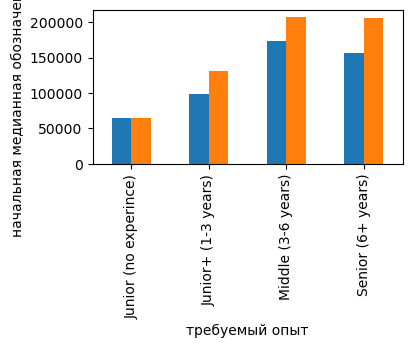

In [280]:
display(round(data.pivot_table(index='experience', columns= 'prof', values='salary_from', aggfunc='mean'),0))
round(data.pivot_table(index='experience', columns= 'prof', values='salary_from', aggfunc='mean'),0).plot(y=['da','sa'], kind='bar', figsize=(4,2), legend = False)
plt.ylabel('начальная медианная обозначенная ЗП ')
plt.xlabel('требуемый опыт')
plt.show()
#display(round(data.groupby(['data, experience'])['salary_from'].mean(),0))
#round(sa.groupby('experience')['salary_from'].mean(),0).plot(y = 'id', kind='bar', figsize=(6, 4), legend = False)

<font color='blue'> Проверим распределение по обозначенным в ваканиях нижне границе заработной платы

experience
Junior (no experince)     64702.0
Junior+ (1-3 years)       98010.0
Middle (3-6 years)       173963.0
Senior (6+ years)        156667.0
Name: salary_from, dtype: float64

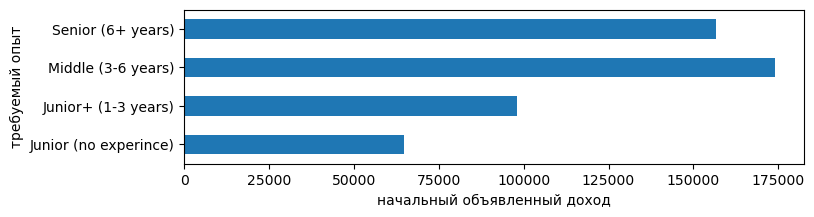

In [282]:
display(round(da.groupby('experience')['salary_from'].mean(),0))
round(da.groupby('experience')['salary_from'].mean(),0).plot(y = 'id', kind='barh', figsize=(8, 2), legend = False)

plt.ylabel('требуемый опыт')
plt.xlabel('начальный объявленный доход')
plt.show()

Оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) -ЗП начиная от 64,7 т.р., Junior+ (1-3 years) - с меданой 98т.р., Middle (3-6 years) c медианой почти 174 т.р., а Senior (6+ years) меlиана составила только 156,7 т.р.

experience
Junior (no experince)     65161.0
Junior+ (1-3 years)      131703.0
Middle (3-6 years)       207499.0
Senior (6+ years)        206698.0
Name: salary_from, dtype: float64

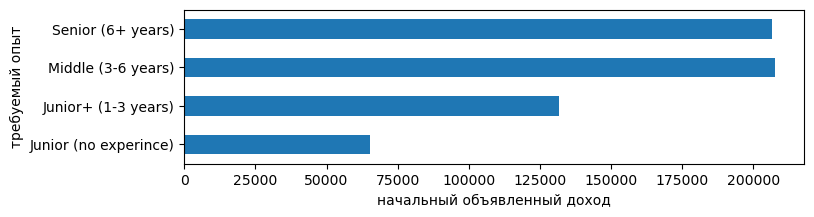

In [284]:
display(round(sa.groupby('experience')['salary_from'].mean(),0))
round(sa.groupby('experience')['salary_from'].mean(),0).plot(y = 'id', kind='barh', figsize=(8, 2), legend = False)

plt.ylabel('требуемый опыт')
plt.xlabel('начальный объявленный доход')
plt.show()

Оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) -ЗП начиная от 65.1 т.р. что сопоставимо с da, а далее имеются существенные различия: так медиана для Junior+ (1-3 years) уже 131 против 98т.р. у da, Middle (3-6 years) c медианой почти 207.5 (у da - 174 т.р.), а Senior (6+ years) медиана составила 206,7 т.р. проти 156,7 т.р. у da но ситуация аналогичная - медианная ЗП для Senior ниже чем для Middle

Оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) - 56 вакансий с ЗП начиная от 64,7 т.р., Junior+ (1-3 years) - 214 вакансий с меданой 98т.р., Middle (3-6 years) - 75 вакансий с медианой почти 174 т.р., а Senior (6+ years) на 3 ваканчии мелиана составила только 156,7 т.р.

##### Тип занятости

In [288]:
display(data.pivot_table(index='employment', columns= ['prof', 'experience'], values='id', aggfunc='count'))


prof                                   da                      \
experience          Junior (no experince) Junior+ (1-3 years)   
employment                                                      
Полная занятость                    123.0              1079.0   
Проектная работа                      1.0                 3.0   
Стажировка                           15.0                 1.0   
Частичная занятость                   3.0                 8.0   

prof                                                      \
experience          Middle (3-6 years) Senior (6+ years)   
employment                                                 
Полная занятость                 549.0              13.0   
Проектная работа                   1.0               NaN   
Стажировка                         NaN               NaN   
Частичная занятость                5.0               NaN   

prof                                   sa                      \
experience          Junior (no experince) Junior+ (1-3 years)   
employment                                                      
Полная занятость                     56.0               851.0   
Проектная работа                      NaN                 1.0   
Стажировка                           29.0                 NaN   
Частичная занятость                   1.0                 NaN   

prof                                                      
experience          Middle (3-6 years) Senior (6+ years)  
employment                                                
Полная занятость                 926.0              44.0  
Проектная работа                   2.0               NaN  
Стажировка                         NaN               NaN  
Частичная занятость                5.0               NaN

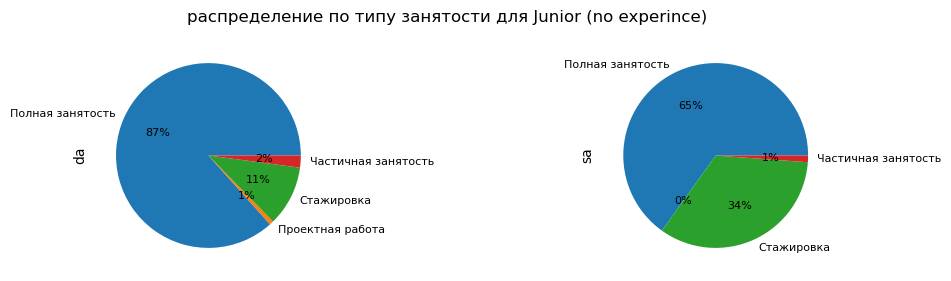

In [289]:
data.query('experience =="Junior (no experince)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по типу занятости для Junior (no experince)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

По типу занятости Junior (no experince) для da примущественно 87% предлагается полная занятость, в 11% стажировка, на частичну занятость 2% и 1% на проектную работу. Для sa также предалагется в большинстве случаев 65% полня занятость стажировка в 38% предложений, 1%-чстичная занятость, вакансий на проектную работу нет.

prof,da,sa
employment,,
Полная занятость,1079.0,851.0
Проектная работа,3.0,1.0
Стажировка,1.0,NaN
Частичная занятость,8.0,NaN


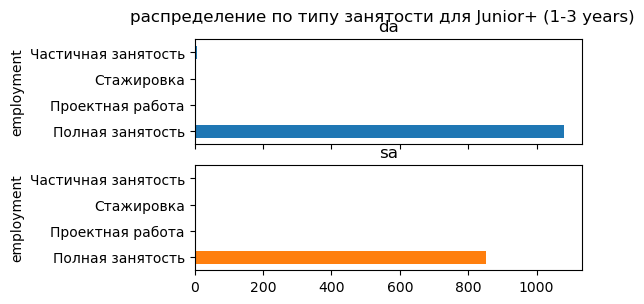

In [291]:
display(data.query('experience =="Junior+ (1-3 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count'))
data.query('experience =="Junior+ (1-3 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='barh',
      subplots = True,figsize=(5,3), 
      title ='распределение по типу занятости для Junior+ (1-3 years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

По типу занятости Junior+ (1-3 years) как для da 99%, так и для sa 100% предлагается полная занятость

prof,da,sa
employment,,
Полная занятость,549,926
Проектная работа,1,2
Частичная занятость,5,5


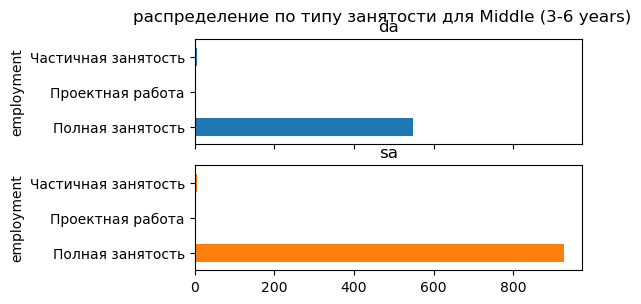

In [293]:
display(data.query('experience =="Middle (3-6 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count'))
data.query('experience =="Middle (3-6 years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='barh',
      subplots = True,figsize=(5,3), 
      title ='распределение по типу занятости для Middle (3-6 years)', legend = False)


#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

для Middle (3-6 years) на обе специальности в 99,9% предлагается только полная занятость

prof,da,sa
employment,,
Полная занятость,13,44


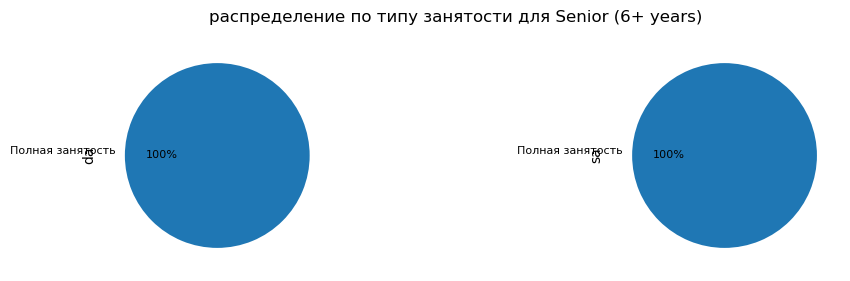

In [295]:
display(data.query('experience =="Senior (6+ years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count'))
data.query('experience =="Senior (6+ years)"').pivot_table(index='employment', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8}, rotatelabels=True,
      title ='распределение по типу занятости для Senior (6+ years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

для Senior (6+ years) на обе специальности предлагается только полная занятость 

Распределение по графику работы у da и sa для вакансий с отсуствивием опыта выглядит следубщим образов: 
-  Junior (no experince) для da примущественно 87% предлагается полная занятость, в 11% стажировка, на частичну занятость 2% и 1% на проектную работу. Для sa также предалагется в большинстве случаев 65% полня занятость стажировка в 38% предложений, 1%-чстичная занятость, вакансий на проектную работу нет.
- для всех остальных грейдов предлагается почти в 100% случаев полная занятость, проектная работа или частичная занятость крайне редкое явление

##### График работы

In [299]:
display(data.pivot_table(index='schedule', columns= ['prof', 'experience'], values='id', aggfunc='count'))


prof                                da                                         \
experience       Junior (no experince) Junior+ (1-3 years) Middle (3-6 years)   
schedule                                                                        
Гибкий график                      3.0                21.0               17.0   
Полный день                      122.0               905.0              406.0   
Сменный график                     2.0                 7.0                NaN   
Удаленная работа                  15.0               158.0              132.0   

prof                                                  sa                      \
experience       Senior (6+ years) Junior (no experince) Junior+ (1-3 years)   
schedule                                                                       
Гибкий график                  NaN                   6.0                36.0   
Полный день                    8.0                  51.0               553.0   
Сменный график                 NaN                   NaN                 NaN   
Удаленная работа               5.0                  29.0               263.0   

prof                                                   
experience       Middle (3-6 years) Senior (6+ years)  
schedule                                               
Гибкий график                  17.0               2.0  
Полный день                   574.0              25.0  
Сменный график                  1.0               NaN  
Удаленная работа              341.0              17.0

In [300]:
#plt.style.available

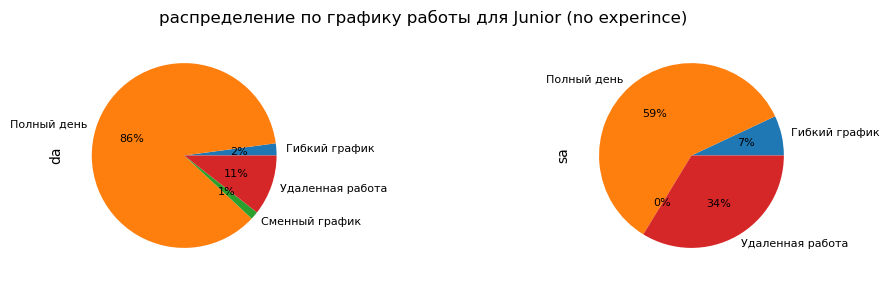

In [301]:
data.query('experience =="Junior (no experince)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Junior (no experince)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.style.use('default')
plt.show()

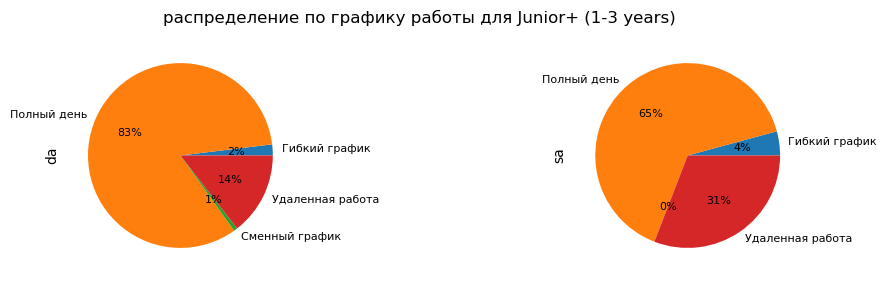

In [302]:
data.query('experience =="Junior+ (1-3 years)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Junior+ (1-3 years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.style.use('default')
plt.show()

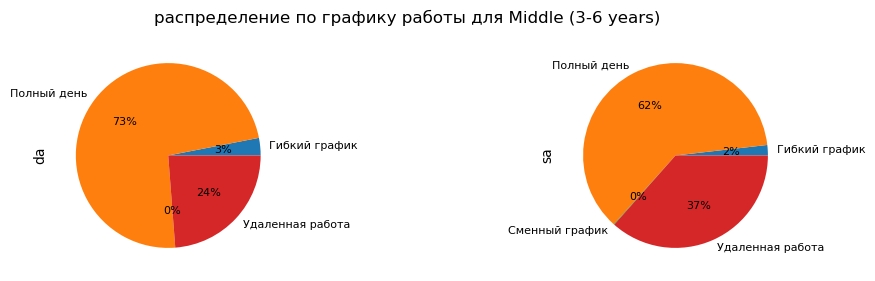

In [303]:
data.query('experience =="Middle (3-6 years)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie',
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Middle (3-6 years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

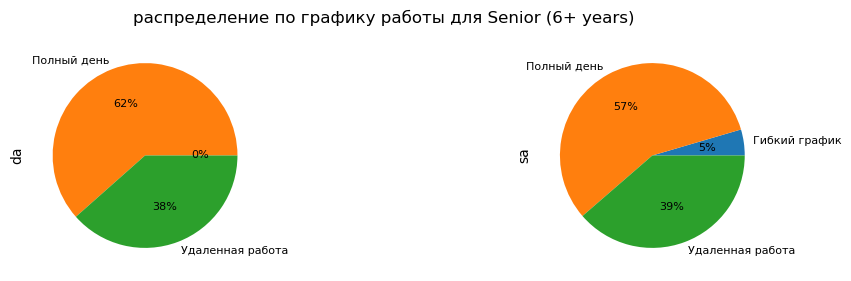

In [304]:
data.query('experience =="Senior (6+ years)"').pivot_table(index='schedule', columns= ['prof'], values='id', aggfunc='count').plot(kind='pie', 
      subplots = True,figsize=(12,3), autopct='%1.0f%%', textprops={'fontsize': 8},
      title ='распределение по графику работы для Senior (6+ years)', legend = False)
#plt.ylabel('количество вакансий')
#plt.xlabel('специализация')
plt.show()

Распределение по графику работы у da и sa для вакансий с отсуствивием опыта выглядит следубщим образов: 
- для da Junior (no experince) преобладает полный рабочий день в 86% вакансий, ужаденная работа предполагается для 11%
- для sa Junior (no experince) также пробладает полный рабочий день но уже только в 59% вакансий. удаленная работа 36%.
- гибий график для этих специальностей примерно на одном уровне 3 и 4% соответственно
Далее по мере увеличения требуемого опыта для da соотношение доля вакансий полного рабочего дня уменьшается а удаленной работы увеличивается: так для Junior+ полный рабочий день составляет уже 83%, удаленная раббоа 14%, для Middle 73% и 24% соответственно, для Senior доля удаленной рабоыты 38%, на полный рабочий день 62%.
Для sa также структура имеет тенденцию к увеличению доли удаленной работы, но диапазон изменения не такой существенный. Так для sa Junior+ доля уденной работы даже уменьшается до 31% а оля на полный рабочий день составляет 65% для Middle распределение 37% и 62% соответственно, для Senior доля удаленной работы 39%, на полный рабочий день 57%, гибкий график 5%.
Итак, для da с ростом опыта имеется тенденция к увеличению удаленной работы с 14 до 38% и уменьшению доля на поный рабочий день86 до 62%, для sa тенденции аналогичные, но динамика изменния в структуре менее выраженная: для уделанной работы диапазон изменения 31% - 39%, для поного рабочего дня 62%-57%

<font color='blue'> Распрееделение вакансий da и sa по городам 

<font color='blue'> проверим распределение вакансий DA по городам и требуемому опыту


In [308]:
da_area = da.pivot_table(index='area', columns='experience', values='id', aggfunc = 'count')
da_area = da_area.fillna(0)
da_area['Total'] = da_area['Junior (no experince)'] + da_area['Junior+ (1-3 years)'] + da_area['Middle (3-6 years)'] + da_area['Senior (6+ years)']

da_area = da_area.sort_values(by='Total', ascending=False).head(10)

display(da_area)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),Total
area,,,,,
москва,71.0,732.0,431.0,13.0,1247.0
санкт-петербург,19.0,106.0,56.0,0.0,181.0
екатеринбург,5.0,33.0,13.0,0.0,51.0
новосибирск,5.0,21.0,7.0,0.0,33.0
нижний новгород,6.0,20.0,7.0,0.0,33.0
владивосток,11.0,18.0,2.0,0.0,31.0
казань,1.0,17.0,11.0,0.0,29.0
краснодар,2.0,17.0,3.0,0.0,22.0
самара,0.0,9.0,2.0,0.0,11.0


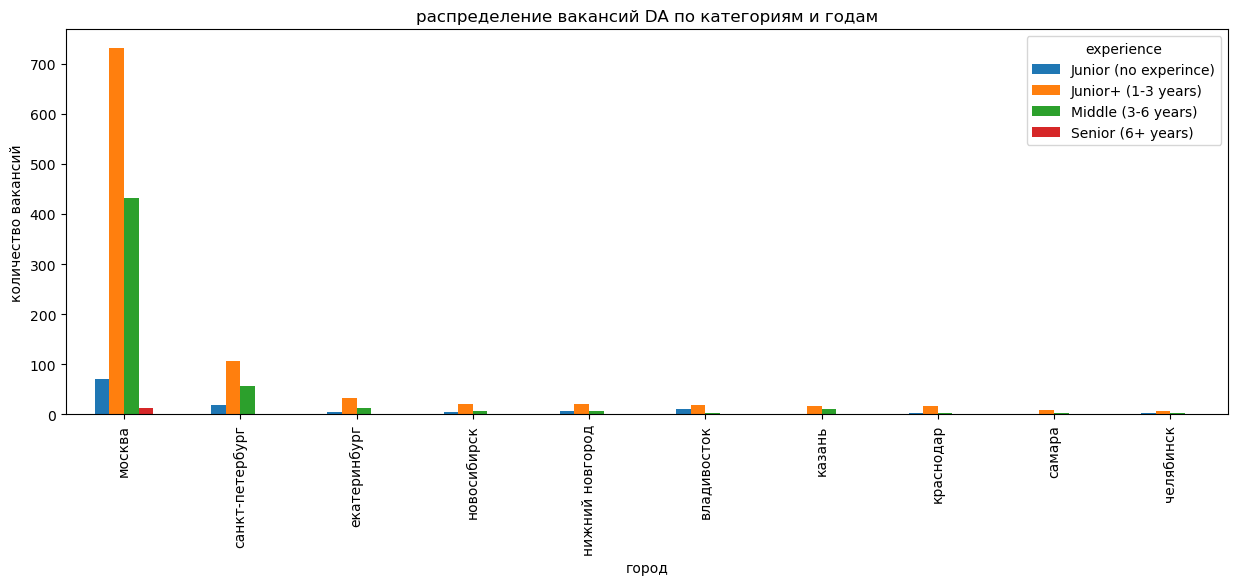

In [309]:
da_area.plot(y=['Junior (no experince)','Junior+ (1-3 years)','Middle (3-6 years)','Senior (6+ years)'], kind='bar', figsize=(15,5))
plt.title('распределение вакансий DA по категориям и годам')
plt.xlabel('город')
plt.ylabel('количество вакансий')
plt.show()

Наибольшее колиество вканасий для Junior (no experince) в Москве-71, С-Петерберге-19, Владивостоке-11, Н.Новгороде-5, Новосибирске-5
Наибольшее колиество вканасий для Junior (1-3 years) в Москве-732, С-Петерберге-106, Екатеринбурге-33, Новосибирске-21, Н.Новгороде-20, Владивостоке-18
Наибольшее колиество вканасий для Middle (3-6 years) в Москве-431, С-Петерберге-56, Екатеринбурге-13, Казань-11, Новосибирске-7, Н.Новгороде-7
Вакансии для Senior (6+ years) только в Москве - 13

<font color='blue'> Проверим распределение вакансий SA по городам и требуемому опыту

In [312]:
sa_area = sa.pivot_table(index='area', columns='experience', values='id', aggfunc = 'count')
sa_area = sa_area.fillna(0)
sa_area['Total'] = sa_area['Junior (no experince)'] + sa_area['Junior+ (1-3 years)'] + sa_area['Middle (3-6 years)'] + sa_area['Senior (6+ years)']

sa_area = sa_area.sort_values(by='Total', ascending=False).head(10)

display(sa_area)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),Total
area,,,,,
москва,27.0,434.0,640.0,33.0,1134.0
санкт-петербург,6.0,100.0,112.0,5.0,223.0
екатеринбург,6.0,35.0,17.0,2.0,60.0
казань,1.0,29.0,21.0,0.0,51.0
новосибирск,4.0,30.0,15.0,0.0,49.0
нижний новгород,2.0,17.0,14.0,0.0,33.0
краснодар,3.0,19.0,7.0,0.0,29.0
самара,2.0,18.0,8.0,1.0,29.0
ростов-на-дону,2.0,14.0,7.0,1.0,24.0


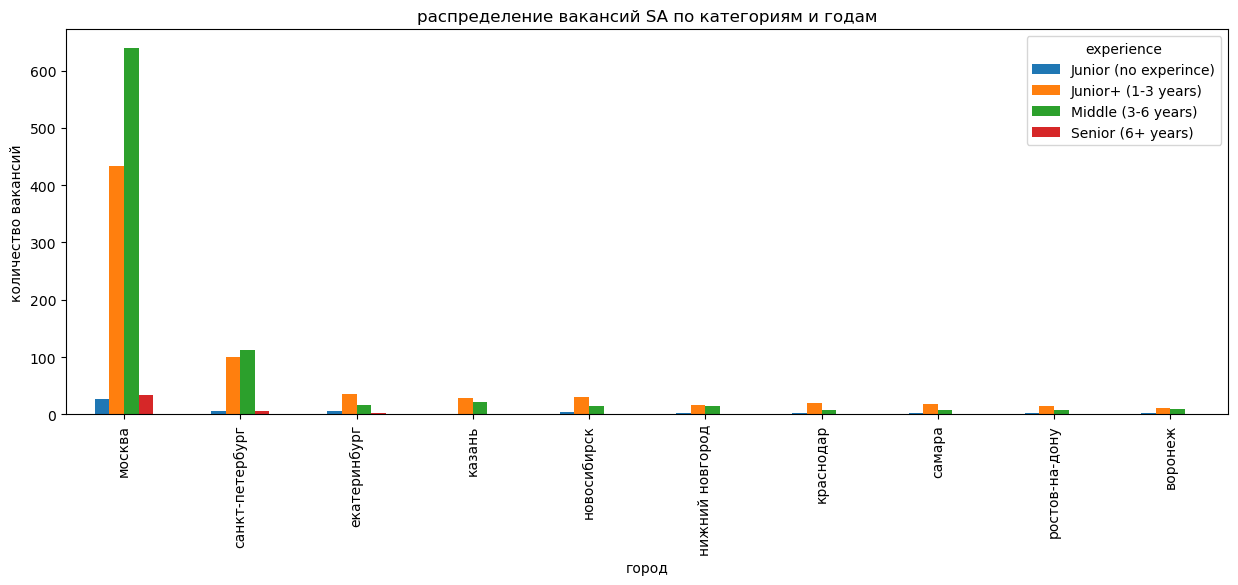

In [313]:
sa_area.plot(y=['Junior (no experince)','Junior+ (1-3 years)','Middle (3-6 years)','Senior (6+ years)'], kind='bar', figsize=(15,5))
plt.title('распределение вакансий SA по категориям и годам')
plt.xlabel('город')
plt.ylabel('количество вакансий')
plt.show()

Наибольшее колиество вканасий для Junior (no experince) в Москве-27, С-Петерберге-6, Екатеринбурге-6, Новосибирске-4, Краснодаре-3, 
Наибольшее колиество вканасий для Junior (1-3 years) в Москве-434, С-Петерберге-100, Екатеринбурге-35, Новосибирске-30, Казань-29 Краснодар-29
Наибольшее колиество вканасий для Middle (3-6 years) в Москве-640, С-Петерберге-112, Казань-21, Екатеринбурге-17,  Новосибирске-15, Н.Новгороде-14
Вакансии для Senior (6+ years) Москве - 33, С-Петерберге-5, Екатеринберг-2, по одной в Самаре и Ростове-на-Дону

По количеству вакансий на da и sa с большим отрывом лидирует Москва, далее СПб, Екатеринбург, Казань, Новосибирском, Н.Ногород

### Определим, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

#### СКИЛЫ

In [318]:
data['key_skills'] = data['key_skills'].fillna('unknown')
data['key_skills_from_key_skills_field'] = data['key_skills_from_key_skills_field'].fillna('unknown')
data['soft_skills_from_description'] = data['soft_skills_from_description'].fillna('unknown')


In [319]:
data['key_skills_1']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[0]
data['key_skills_2']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[1]
data['key_skills_3']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[2]
data['key_skills_4']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[3]
data['key_skills_5']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[4]
data['key_skills_6']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[5]
data['key_skills_7']=data['key_skills_from_key_skills_field'].str.split(',', expand = True)[6]


In [320]:
data['soft_skills_1']=data['soft_skills_from_description'].str.split(',', expand = True)[0]
data['soft_skills_2']=data['soft_skills_from_description'].str.split(',', expand = True)[1]
data['soft_skills_3']=data['soft_skills_from_description'].str.split(',', expand = True)[2]
data['soft_skills_4']=data['soft_skills_from_description'].str.split(',', expand = True)[3]
data['soft_skills_5']=data['soft_skills_from_description'].str.split(',', expand = True)[4]


In [321]:
display(data.head(5))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,key_skills_3,key_skills_4,key_skills_5,key_skills_6,key_skills_7,soft_skills_1,soft_skills_2,soft_skills_3,soft_skills_4,soft_skills_5
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,dns головной офис,NaN,владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",...,python,субд,None,None,None,unknown,None,None,None,None
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,комус,NaN,москва,Junior (no experince),"['ms sql', 'работа с базами данных', 'ms excel']",...,excel,None,None,None,None,unknown,None,None,None,None
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,dns головной офис,NaN,владивосток,Junior+ (1-3 years),"['sql', 'power bi', 'субд', 'python', 'clickho...",...,python,субд,bpmn,clickhouse,None,unknown,None,None,None,None
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,х5 group,"X5 GROUP, Центральный офис",москва,Junior+ (1-3 years),"['анализ данных', 'коммуникация', 'sql', 'ms o...",...,python,hadoop,нive,аналитические исследования,навыки презентации,Коммуникация,None,None,None,None
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,лукойл,NaN,москва,Middle (3-6 years),['документация'],...,None,None,None,None,None,Документация,None,None,None,None


зададим поля для индексов хард и софт скилов по первым столбцам как предположительно наиболе часто указываемых и желаемых скилов у кандидатов на вакансии

In [323]:
data['key_skills_index'] = data['key_skills_1']
data['soft_key_skills_index'] = data['soft_skills_1']

In [324]:
#display(data.head())

### Оценим какие софты чаще требуются для DA и SA


HARD  sql                       34.615385
      python                    11.107811
      unknown                   10.513811
      анализ данных              3.771904
      excel                      3.385803
      аналитическое мышление     2.940303
      power bi                   2.108702
      data analysis              1.173151
      работа с базами данных     0.876151
      powerpoint                 0.772201
SOFT  unknown                   18.013068
      Коммуникация               4.172854
      Документация               3.816454
      Аналитическое мышление     1.618652
      Проактивность              0.653401
      Креативность               0.252450
      Адаптивность               0.059400
      Принятие решений           0.059400
      Переговоры                 0.044550
      Решение проблем            0.044550
Name: skills_sum, dtype: float64

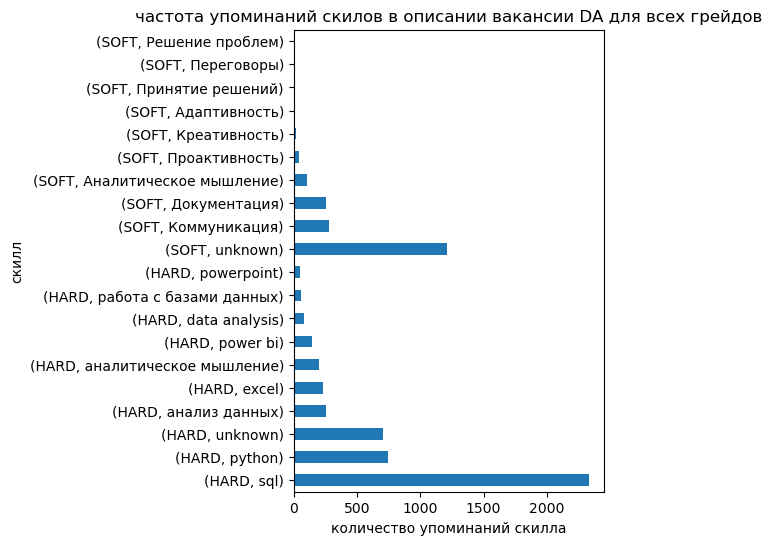

HARD  sql                               20.060143
      bpmn                              11.502318
      системный анализ                  10.437289
      unknown                            8.031575
      uml                                6.665831
      api                                5.688510
      аналитическое мышление             2.969553
      бизнес-анализ                      2.393184
      xml                                1.716577
      разработка технических заданий     1.666458
SOFT  Документация                      15.461722
      Коммуникация                       6.415236
      unknown                            6.114522
      Аналитическое мышление             0.488661
      Проактивность                      0.238065
      Тайм-менеджмент                    0.087708
      Переговоры                         0.062649
Name: skills_sum, dtype: float64

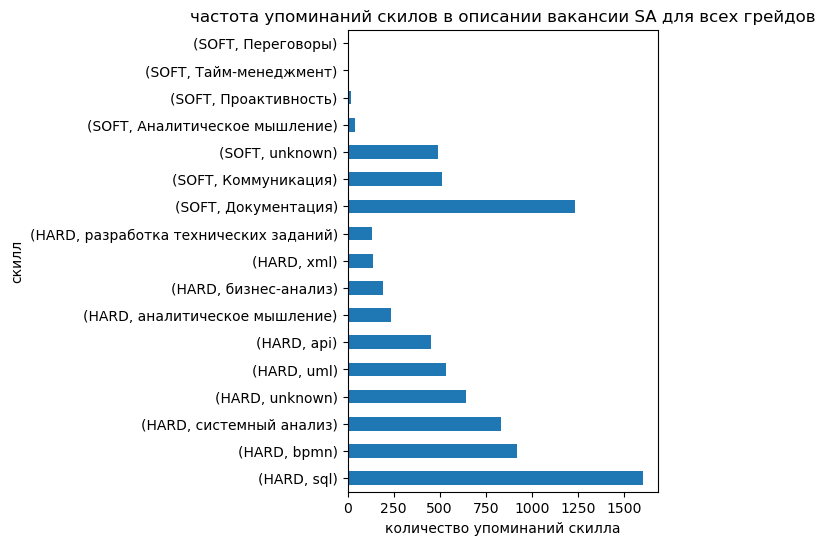

In [326]:
data_da_skills_all = data.query('prof == "da"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
data_da_skills_all['skills_sum'] = data_da_skills_all['key_skills_1']+data_da_skills_all['key_skills_2']+data_da_skills_all['key_skills_3']+data_da_skills_all['key_skills_4']+data_da_skills_all['key_skills_5']+data_da_skills_all['key_skills_6']+data_da_skills_all['key_skills_7']
data_da_skills_all=data_da_skills_all['skills_sum'].sort_values(ascending=False).head(10)

da_soft_all = data.query('prof == "da"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')

da_soft_all['skills_sum'] = da_soft_all['soft_skills_1']+da_soft_all['soft_skills_2']+da_soft_all['soft_skills_3']+da_soft_all['soft_skills_4']+da_soft_all['soft_skills_5']
da_soft_all = da_soft_all['skills_sum'].sort_values(ascending=False).head(10)
data_da_skills_all= pd.concat([data_da_skills_all, da_soft_all], axis=0, keys=['HARD', 'SOFT'])

display(data_da_skills_all.transform(lambda x: 100 * x / x.sum()))

data_da_skills_all.plot(kind='barh', figsize=(4,6), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA для всех грейдов')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_all = data.query('prof == "sa"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
data_sa_skills_all['skills_sum'] = data_sa_skills_all['key_skills_1']+data_sa_skills_all['key_skills_2']+data_sa_skills_all['key_skills_3']+data_sa_skills_all['key_skills_4']+data_sa_skills_all['key_skills_5']+data_sa_skills_all['key_skills_6']+data_sa_skills_all['key_skills_7']
data_sa_skills_all = data_sa_skills_all['skills_sum'].sort_values(ascending=False).head(10)

sa_soft_all = data.query('prof == "sa"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
sa_soft_all['skills_sum'] = sa_soft_all['soft_skills_1']+sa_soft_all['soft_skills_2']+sa_soft_all['soft_skills_3']+sa_soft_all['soft_skills_4']+sa_soft_all['soft_skills_5']
sa_soft_all = sa_soft_all['skills_sum'].sort_values(ascending=False).head(10)

data_sa_skills_all= pd.concat([data_sa_skills_all, sa_soft_all], axis=0, keys=['HARD', 'SOFT'])

display(data_sa_skills_all.transform(lambda x: 100 * x / x.sum()))


data_sa_skills_all.plot(kind='barh', figsize=(4,6), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA для всех грейдов')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

в таблицах и на графиках хорошо видно, что для харды указываются в описании вакансий чаще чем софты, исключением для SA является требвание к документации, которое находится на 2м месте после знаний  sql

### Проверим какие HARD-skills требуются для DA и SA отдельно по каждому грейду  

key_skills_index
sql                                    84
unknown                                55
анализ данных                          50
python                                 49
excel                                  35
аналитическое мышление                 29
английский язык                        14
пользователь пк                        12
power bi                               11
работа с большим объемом информации    10
Name: skills_sum, dtype: int64

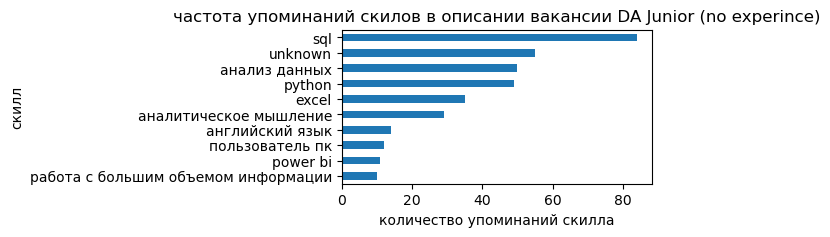

key_skills_index
sql                                    113
аналитическое мышление                  49
системный анализ                        45
unknown                                 32
работа с большим объемом информации     17
разработка технических заданий          17
постановка задач разработчикам           7
активные продажи                         7
клиентоориентированность                 7
деловое общение                          7
Name: skills_sum, dtype: int64

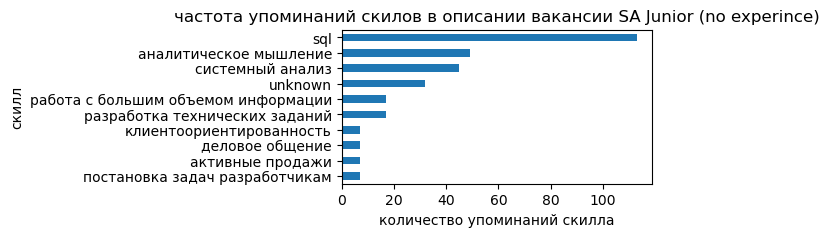

In [413]:
data_da_skills_no_exp = data.query('prof == "da" & experience == "Junior (no experince)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_no_exp['skills_sum'] = data_da_skills_no_exp['key_skills_1']+data_da_skills_no_exp['key_skills_2']+data_da_skills_no_exp['key_skills_3']+data_da_skills_no_exp['key_skills_4']+data_da_skills_no_exp['key_skills_5']+data_da_skills_no_exp['key_skills_6']+data_da_skills_no_exp['key_skills_7']
display(data_da_skills_no_exp['skills_sum'].sort_values(ascending=False).head(10))

data_da_skills_no_exp['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_no_exp = data.query('prof == "sa"& experience == "Junior (no experince)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills_no_exp['skills_sum'] = data_sa_skills_no_exp['key_skills_1']+data_sa_skills_no_exp['key_skills_2']+data_sa_skills_no_exp['key_skills_3']+data_sa_skills_no_exp['key_skills_4']+data_sa_skills_no_exp['key_skills_5']+data_sa_skills_no_exp['key_skills_6']+data_sa_skills_no_exp['key_skills_7']
display(data_sa_skills_no_exp['skills_sum'].sort_values(ascending=False).head(10))

data_sa_skills_no_exp['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Junior (no experince)':
 - DA: наиболее часто встречающиеся скилы ТОП-5 sql, анализ данных, python, excel, аналитической мышление. 
 - SA: наиболее часто встречающиеся скилы ТОП-5 sql, аналитическое мышление, системный анали, работа с большим объемом информации, разработка технической документации
* Что характерно для DA в большем приоритете умение пльзоваться инструментами для анализа и визуализаций, для SA больше требований к работе с документацией, взаимодействию с клиентами и коллегами. Распределение требований по ТОП-5 на графике показывает прмерно одинаковое количество требований для грейда Junior (no experince)

key_skills_index
sql                       1473
unknown                    445
python                     377
анализ данных              152
excel                      126
аналитическое мышление     121
power bi                   120
работа с базами данных      49
powerpoint                  37
аналитика                   34
Name: skills_sum, dtype: int64

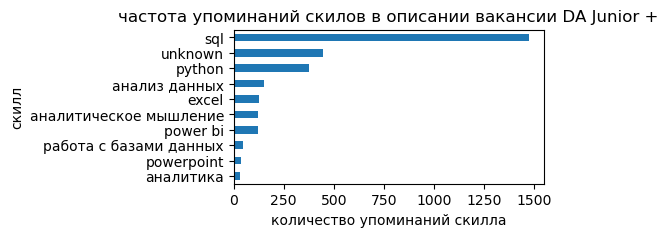

key_skills_index
sql                               662
bpmn                              452
системный анализ                  333
unknown                           285
api                               201
uml                               179
аналитическое мышление            118
бизнес-анализ                      77
разработка технических заданий     58
visio                              43
Name: skills_sum, dtype: int64

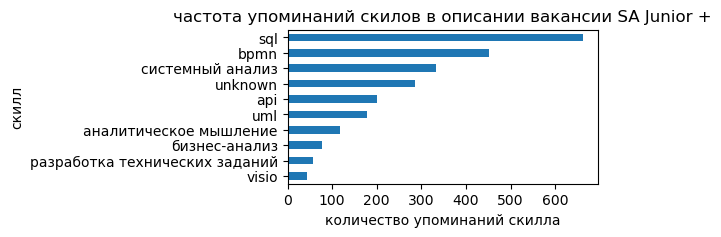

In [415]:
data_da_skills_junior = data.query('prof == "da" & experience == "Junior+ (1-3 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_junior['skills_sum'] = data_da_skills_junior['key_skills_1']+data_da_skills_junior['key_skills_2']+data_da_skills_junior['key_skills_3']+data_da_skills_junior['key_skills_4']+data_da_skills_junior['key_skills_5']+data_da_skills_junior['key_skills_6']+data_da_skills_junior['key_skills_7']
display(data_da_skills_junior['skills_sum'].sort_values(ascending=False).head(10))

data_da_skills_junior['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior +')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills__junior = data.query('prof == "sa"& experience == "Junior+ (1-3 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills__junior['skills_sum'] = data_sa_skills__junior['key_skills_1']+data_sa_skills__junior['key_skills_2']+data_sa_skills__junior['key_skills_3']+data_sa_skills__junior['key_skills_4']+data_sa_skills__junior['key_skills_5']+data_sa_skills__junior['key_skills_6']+data_sa_skills__junior['key_skills_7']
display(data_sa_skills__junior['skills_sum'].sort_values(ascending=False).head(10))

data_sa_skills__junior['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior +')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Junior + (1-3 years):
 - DA: наиболее часто встречающиеся скилы ТОП-5 sql, анализ данных, python, excel - такие же как и для Junior без опыта, умения работать с инстрментами визуализации power bi, powerpoint
 - SA: наиболее часто встречающиеся скилы ТОП-5 помимо ранее обозначенных для сосискателей бех опыта такие как sql, системный анализ добавляются требования к знанию bpmn и работа с  api, uml, бизнес-анализ, разработка технических заданий
* Для DA в большем приоритете умение пльзоваться инструментами для анализа и визуализации, для SA требуются умения исользовать инструменты для описания и выстраивания процессов, бизнесс-анализ. Распределение требований по ТОП-5 на графике DA показывает, что знание sql иет с заментым приемущестом перед другими навыками, тогда как для SA частота упоминания требований снижается плавно, что свидетельствет о том что набор навыков для SA больше

key_skills_index
sql                         750
python                      299
unknown                     206
excel                        67
анализ данных                52
data analysis                50
аналитическое мышление       48
коммуникативная гибкость     30
vba                          28
ml                           21
Name: skills_sum, dtype: int64

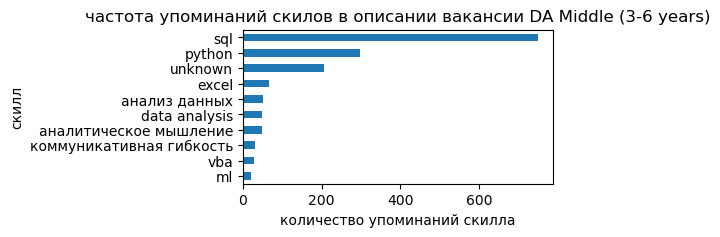

key_skills_index
sql                               795
bpmn                              440
системный анализ                  413
uml                               330
unknown                           312
api                               239
бизнес-анализ                     114
xml                                99
аналитическое мышление             70
разработка технических заданий     58
Name: skills_sum, dtype: int64

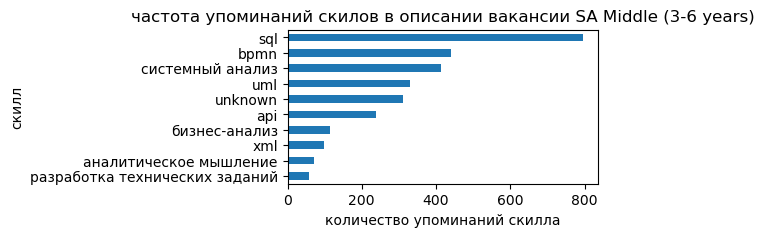

In [417]:
data_da_skills_middle = data.query('prof == "da" & experience == "Middle (3-6 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_middle['skills_sum'] = data_da_skills_middle['key_skills_1']+data_da_skills_middle['key_skills_2']+data_da_skills_middle['key_skills_3']+data_da_skills_middle['key_skills_4']+data_da_skills_middle['key_skills_5']+data_da_skills_middle['key_skills_6']+data_da_skills_middle['key_skills_7']
display(data_da_skills_middle['skills_sum'].sort_values(ascending=False).head(10))

data_da_skills_middle['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_middle = data.query('prof == "sa"& experience == "Middle (3-6 years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills_middle['skills_sum'] = data_sa_skills_middle['key_skills_1']+data_sa_skills_middle['key_skills_2']+data_sa_skills_middle['key_skills_3']+data_sa_skills_middle['key_skills_4']+data_sa_skills_middle['key_skills_5']+data_sa_skills_middle['key_skills_6']+data_sa_skills_middle['key_skills_7']
display(data_sa_skills_middle['skills_sum'].sort_values(ascending=False).head(10))

data_sa_skills_middle['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Middle (3-6 years):
- DA: и снова наиболее часто встречающиеся скилы ТОП-5 sql, анализ данных, python, excel. Такк же будет плюсом коммуникативная гибкость, vba, ml
- SA: наиболее часто встречающиеся скилы ТОП-5 sql, системный анализ добавляются требования к знанию bpmn и uml. В ТОП-10 также входят знания бизнес-анализа, xml, разработка технических заданий
* Для DA в большем приоритете умение пльзоваться инструментами для анализа, для SA требуются умения исользовать инструменты для описания и выстраивания процессов, систематизации и структурированию. Распределение требований по ТОП-5 на графике DA показывает, что в топе также требование зания sql, для SA частота упоминания sql также наиболее высокая, но другие скилы имеют значительный вес, что свидетельствет о том что набор навыков для SA больше чем для DA

key_skills_index
sql                  24
python               23
основы баз данных     7
unknown               2
Name: skills_sum, dtype: int64

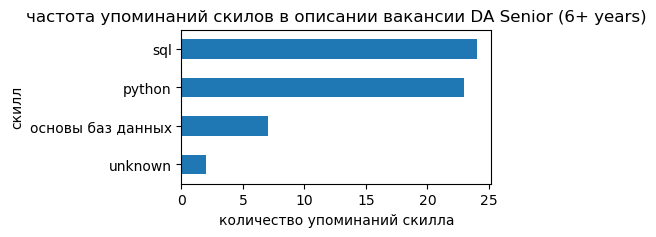

key_skills_index
системный анализ    42
sql                 31
bpmn                26
uml                 20
api                 14
xml                 13
unknown             12
dwh                  7
erp                  7
json api             7
Name: skills_sum, dtype: int64

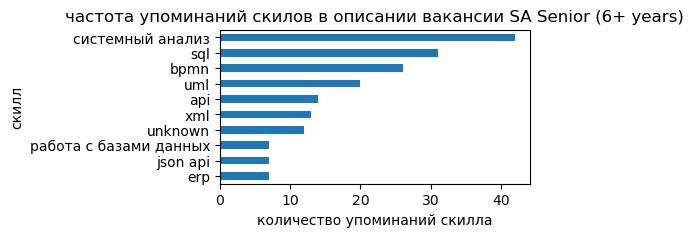

In [419]:
data_da_skills_senior = data.query('prof == "da" & experience == "Senior (6+ years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_da_skills_senior['skills_sum'] = data_da_skills_senior['key_skills_1']+data_da_skills_senior['key_skills_2']+data_da_skills_senior['key_skills_3']+data_da_skills_senior['key_skills_4']+data_da_skills_senior['key_skills_5']+data_da_skills_senior['key_skills_6']+data_da_skills_senior['key_skills_7']
display(data_da_skills_senior['skills_sum'].sort_values(ascending=False).head(10))

data_da_skills_senior['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

data_sa_skills_senior = data.query('prof == "sa"& experience == "Senior (6+ years)"').pivot_table(index='key_skills_index', values = ['key_skills_1','key_skills_2','key_skills_3','key_skills_4','key_skills_5','key_skills_6','key_skills_7'],
    aggfunc='count').sort_values(by = 'key_skills_1', ascending=False) 
#.head(15)
data_sa_skills_senior['skills_sum'] = data_sa_skills_senior['key_skills_1']+data_sa_skills_senior['key_skills_2']+data_sa_skills_senior['key_skills_3']+data_sa_skills_senior['key_skills_4']+data_sa_skills_senior['key_skills_5']+data_sa_skills_senior['key_skills_6']+data_sa_skills_senior['key_skills_7']
display(data_sa_skills_senior['skills_sum'].sort_values(ascending=False).head(10))

data_sa_skills_senior['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Senior (6+ years):
 - DA: кроме уже вывленных ранее хардов sql, анализ данных, python для менее опытных соискателей для Senior появляется требвание знаний основ баз данных, преполагается что опытный Senior кроме непосредственного анализа данных имеет практические навыки в построении баз данных
 - SA: наиболее часто встречающиеся скилы помимо ранее обозначенных для сосискателей бех опыта такие как sql, системный анализ добавляются требования к знанию bpmn и uml
* Для DA в большем приоритете умение пльзоваться инструментами для анализа и знание основ работы с базами данных, всего 3 навыка, что может объясняться малым количеством DA уровня Senior в выборке вакансий. Для SA требуются умения исользовать инструменты для описания и выстраивания процессов, систематизации и структурированию данных и в целом больше требований к хардам.

Для DA для всех грейдов ключевыми ТОП-5 хардами являются sql, python, анализ данных, excel и основы баз данных для наиболее опытных сосискателей.
Для SA единственных сходством с DA является требования знаний sql, отличительными особенностями ялвется умение использовать bpmn, uml, api, xml, dwh, erp, json позволяющие описывать, систематизировать и оптимизировать бизнсс-процессы, эфективно взаимодействовать с заказчиками и коллегми. Кроме того, можно отметить, что для SA количество небходимых навыков больше чем для DA. 

### Проверим какие SOFT-skills требуются для DA и SA отдельно по каждому грейду  

soft_key_skills_index
unknown                   97
Коммуникация              28
Документация              20
Аналитическое мышление     9
Проактивность              4
Name: skills_sum, dtype: int64

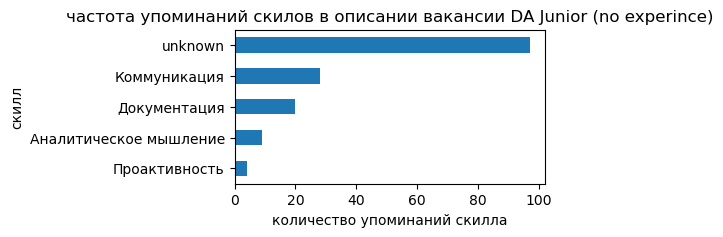

soft_key_skills_index
Документация              63
unknown                   31
Коммуникация              16
Аналитическое мышление     2
Name: skills_sum, dtype: int64

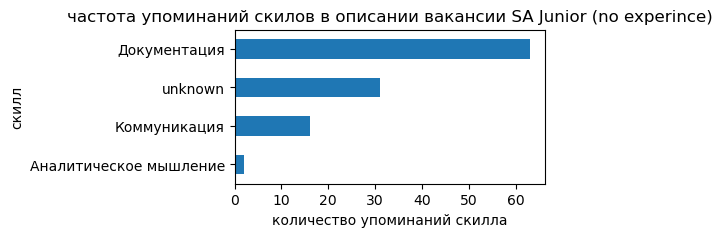

In [423]:
da_soft_junior_no_exp = data.query('prof == "da" & experience == "Junior (no experince)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_junior_no_exp['skills_sum'] = da_soft_junior_no_exp['soft_skills_1']+da_soft_junior_no_exp['soft_skills_2']+da_soft_junior_no_exp['soft_skills_3']+da_soft_junior_no_exp['soft_skills_4']+da_soft_junior_no_exp['soft_skills_5']
display(da_soft_junior_no_exp['skills_sum'].sort_values(ascending=False).head(10))

da_soft_junior_no_exp['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_junior_no_exp = data.query('prof == "sa"& experience == "Junior (no experince)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_junior_no_exp['skills_sum'] = sa_soft_junior_no_exp['soft_skills_1']+sa_soft_junior_no_exp['soft_skills_2']+sa_soft_junior_no_exp['soft_skills_3']+sa_soft_junior_no_exp['soft_skills_4']+sa_soft_junior_no_exp['soft_skills_5']
display(sa_soft_junior_no_exp['skills_sum'].sort_values(ascending=False).head(10))

sa_soft_junior_no_exp['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior (no experince)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Junior (no experince):
 для DA и SA ключевыми навыками для соискателей без опыта работы ялвюятся работа с документацией и развитая коммуникация

soft_key_skills_index
unknown                   732
Коммуникация              152
Документация              134
Аналитическое мышление     89
Проактивность              24
Креативность               10
Адаптивность                4
Принятие решений            4
Переговоры                  3
Тайм-менеджмент             2
Name: skills_sum, dtype: int64

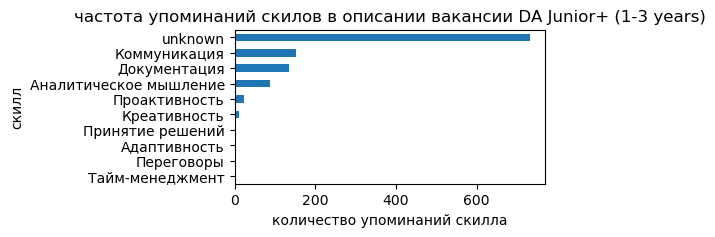

soft_key_skills_index
Документация              530
Коммуникация              233
unknown                   224
Аналитическое мышление     23
Проактивность              19
Переговоры                  2
Name: skills_sum, dtype: int64

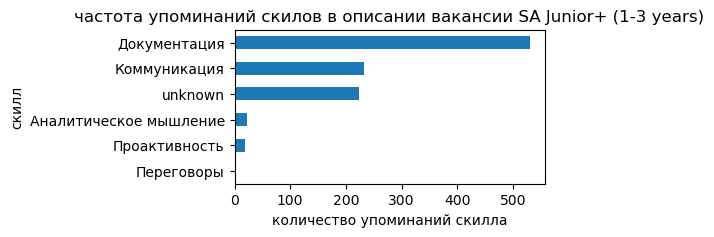

In [426]:
da_soft_jun_ = data.query('prof == "da" & experience == "Junior+ (1-3 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_jun_['skills_sum'] = da_soft_jun_['soft_skills_1']+da_soft_jun_['soft_skills_2']+da_soft_jun_['soft_skills_3']+da_soft_jun_['soft_skills_4']+da_soft_jun_['soft_skills_5']
display(da_soft_jun_['skills_sum'].sort_values(ascending=False).head(10))

da_soft_jun_['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Junior+ (1-3 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_jun_ = data.query('prof == "sa"& experience == "Junior+ (1-3 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_jun_['skills_sum'] = sa_soft_jun_['soft_skills_1']+sa_soft_jun_['soft_skills_2']+sa_soft_jun_['soft_skills_3']+sa_soft_jun_['soft_skills_4']+sa_soft_jun_['soft_skills_5']
display(sa_soft_jun_['skills_sum'].sort_values(ascending=False).head(10))

sa_soft_jun_['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Junior+ (1-3 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

для Junior+ DA и SA ключевыми навыками для соискателей без опыта работы ялвюятся работа с документацией, развитая коммуникация и добавляется требование в наличии проактивности

soft_key_skills_index
unknown                   380
Документация              100
Коммуникация               90
Проактивность              12
Аналитическое мышление     11
Креативность                7
Решение проблем             2
Name: skills_sum, dtype: int64

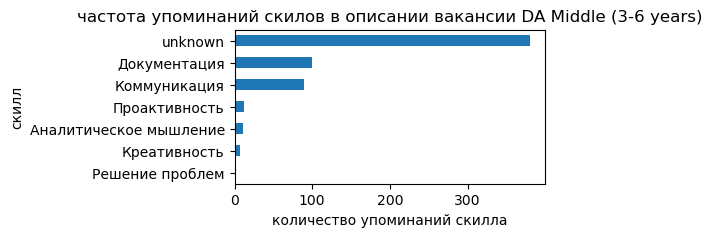

soft_key_skills_index
Документация              615
Коммуникация              249
unknown                   219
Аналитическое мышление     14
Тайм-менеджмент             7
Переговоры                  3
Name: skills_sum, dtype: int64

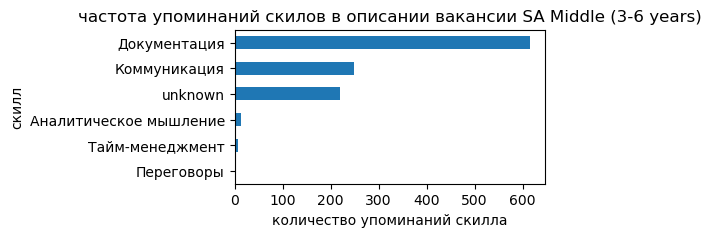

In [428]:
da_soft_midddle = data.query('prof == "da" & experience == "Middle (3-6 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_midddle['skills_sum'] = da_soft_midddle['soft_skills_1']+da_soft_midddle['soft_skills_2']+da_soft_midddle['soft_skills_3']+da_soft_midddle['soft_skills_4']+da_soft_midddle['soft_skills_5']
display(da_soft_midddle['skills_sum'].sort_values(ascending=False).head(10))

da_soft_midddle['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_midddle = data.query('prof == "sa"& experience == "Middle (3-6 years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_midddle['skills_sum'] = sa_soft_midddle['soft_skills_1']+sa_soft_midddle['soft_skills_2']+sa_soft_midddle['soft_skills_3']+sa_soft_midddle['soft_skills_4']+sa_soft_midddle['soft_skills_5']
display(sa_soft_midddle['skills_sum'].sort_values(ascending=False).head(10))

sa_soft_midddle['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Middle (3-6 years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Middle (3-6 years):
 для DA и SA ключевыми навыками для опытных соискателей ялвятся работа с документацией, развитая коммуникация и проактивность
 для SA работа с документацией, развитая коммуникация и тайм-менеджмнт

soft_key_skills_index
Коммуникация     11
unknown           4
Проактивность     4
Документация      3
Name: skills_sum, dtype: int64

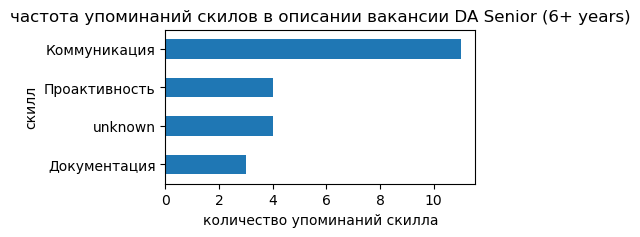

soft_key_skills_index
Документация    26
unknown         14
Коммуникация    14
Name: skills_sum, dtype: int64

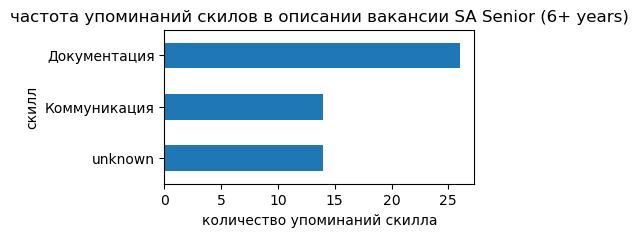

In [430]:
da_soft_senior = data.query('prof == "da" & experience == "Senior (6+ years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
da_soft_senior['skills_sum'] = da_soft_senior['soft_skills_1']+da_soft_senior['soft_skills_2']+da_soft_senior['soft_skills_3']+da_soft_senior['soft_skills_4']+da_soft_senior['soft_skills_5']
display(da_soft_senior['skills_sum'].sort_values(ascending=False).head(10))

da_soft_senior['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии DA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

sa_soft_senior = data.query('prof == "sa"& experience == "Senior (6+ years)"').pivot_table(index='soft_key_skills_index', values = ['soft_skills_1','soft_skills_2','soft_skills_3','soft_skills_4','soft_skills_5'],
    aggfunc='count')
#.head(15)
sa_soft_senior['skills_sum'] = sa_soft_senior['soft_skills_1']+sa_soft_senior['soft_skills_2']+sa_soft_senior['soft_skills_3']+sa_soft_senior['soft_skills_4']+sa_soft_senior['soft_skills_5']
display(sa_soft_senior['skills_sum'].sort_values(ascending=False).head(10))

sa_soft_senior['skills_sum'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(4,2), legend = False)
plt.title('частота упоминаний скилов в описании вакансии SA Senior (6+ years)')
plt.xlabel('количество упоминаний скилла')
plt.ylabel('скилл')
plt.show()

Senior (6+ years): для DA и SA ключевыми навыками по софтам является работа с документацией, развитая коммуникация и дополнительно для DA проактивность

В софт скиллах существенных отличий между DA и SA нет. Ключевыми навыками является документаци, комуникативные навыки, проактивность. для всех грейдов 

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам

* Ключевые навыки для DA:
- Junior (no experince)
    - hard-skills: sql, python, анализ данных, excel, аналитическое мышление
    - soft-skills: документаци, комуникативные навыки
- Junior+
    - hard-skills: sql, python, анализ данных, excel, аналитическое мышление, умения работать с инстрментами визуализации power bi, powerpoint
    - soft-skills: документаци, комуникативные навыки
- Middle:
    - hard-skills: sql, python, анализ данных, excel, коммуникативная гибкость, 
vb,a2

  - soft-skills: документаци, комуникативные навыки, проактивность
- Senior:
    - hard-skills: sql, python, анализ данных, базы данных
    - soft-skills: документаци, комуникативные навыки, проактивность

* Ключевые навыки для SA:
- Junior (no experince)
    - hard-skills:sql, аналитическое мышление, системный анализ, работа с большим объемом информации
    - soft-skills: документаци, комуникативные навыки
- Junior+
    - hard-skills:sql, системный анализ, bpmn,  api, uml, бизнес-анализ, разработка технических заданий
    - soft-skills: документаци, комуникативные навыки
- Middle:
    - hard-skills:sql, системный анализ, bpmn, , бизнес-анализа, xml, разработка технических заданийuml
    - soft-skills: документаци, комуникативные навыки, тайм-менеджмент
- Senior:
    - hard-skil sql, bpmn, uml, api, xml, dwh, erp, jsonных
    - soft-skills: документаци, комуникативные навыки



# Выводы и рекомендаций


##### Проанализирована информация о вакансиях DA и SA на основе данных hh.ru
- Сравнивая количество объявлений можно предположить, что спрос на указанных специалистов примерно одинаковый -  1805 и 1915 вакансий на DA и SA соответтвенно.
- Грейды Junior (no experince), Junior+ (1-3 years), 'Middle (3-6 years','Senior (6+ years' 
* Чаще всего работодатели заинтересованы в специалистах уровня Junior+ (1-3 years), Middle (3-6 years)
<br> - Из 1801 вакансии DA больше свего ищут категорию Junior+ (1-3 years) 1091 вкансия - 60.6%, 555 вакансий на Middle (3-6 years) или 30,8%, соскателей без опыт ищут реже - всего 142 вакансии для Junior (no experince) - 7,9%. Реже всего ищут Senior (6+ years) всего 13 вакансий или 0,7%. Скорее всего это обусловлено высокой степенью квалификации и такого рода сотрудников могут искать используя другие каналы на пример конференции, неформальные каналы, сообщества в соц.сетях.
<br> - По вакансиям sa из 1915 в отличии от da наибольшую долю в структуре вакансий занимают Middle (3-6 years) - 48,72% или 933 , 44,5% или 852 вакансии для Junior+ (1-3 years), для Junior (no experince) всего 86 вакансий или 4,5%. Senior (6+ years) ищут в 2,3% или 44 вакансиях.

 * ТОП работодатель:
<br> -  Лидерство по размещенным вакансия da занимает сбер с 243 вакансиями, с заметным отставанием wildberries - 43 и ozon 34 вакансии. В 5-ку лидер также вошли банк втб - 28 вакансий и ит-холдинг т1 - 26 вакансий.
<br> - Лидерство по размещенным вакансиям sa занимает сбер с 95 вакансиями, за ним следует ит-холдинг т1 - 43, aston 34 вакансии в 5-ку лидеров также вошли совкомбанк технологии - 37, ПСБ (ПАО «Промсвязьбанк») - 30 вакансий. Распределение по ТОП-10 более "ровное" по сравнению с da, больше представлены банки или их дочерние структуры

* Зарплатные предложения:
<br> Для DA рценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) -ЗП начиная от 64,7 т.р., Junior+ (1-3 years) - с меданой 98т.р., Middle (3-6 years) c медианой почти 174 т.р., а Senior (6+ years) меlиана составила только 156,7 т.р.
<br> Для SA оценка медианного дохода в вакансиях с указанным параметром самая низка у Junior (no experince) - 56 вакансий с ЗП начиная от 64,7 т.р., Junior+ (1-3 years) - 214 вакансий с меданой 98т.р., Middle (3-6 years) - 75 вакансий с медианой почти 174 т.р., а Senior (6+ years) на 3 ваканчии мелиана составила только 156,7 т.р.
- на уровне Junior (no experince) зарплатные предложения для DA сопоставимы SA, но с ростом грейда SA по уровню предлагаемых доходов выходит вперед п сравнения с DA

* Тип занятости: распределение по графику работы у da и sa для вакансий с отсуствивием опыта выглядит следубщим образов: 
<br> - Junior (no experince) для da примущественно 87% предлагается полная занятость, в 11% стажировка, на частичну занятость 2% и 1% на проектную работу. Для sa также предалагется в большинстве случаев 65% полня занятость стажировка в 38% предложений, 1%-чстичная занятость, вакансий на проектную работу нет.
<br> - для грейдов Junior+ (1-3 years), Middle (3-6 years), Senior предлагается почти в 100% случаев полная занятость, проектная работа или частичная занятость крайне редкое явление

* Распределение по графику работы у da и sa для вакансий с отсуствивием опыта выглядит следубщим образов: 
<br> - для da Junior (no experince) преобладает полный рабочий день в 86% вакансий, ужаденная работа предполагается для 11%
<br> - для sa Junior (no experince) также пробладает полный рабочий день но уже только в 59% вакансий. удаленная работа 36%.
<br> - гибий график для этих специальностей примерно на одном уровне 3 и 4% соответственно
<br> Далее по мере увеличения требуемого опыта для da соотношение доля вакансий полного рабочего дня уменьшается а удаленной работы увеличивается: так для Junior+ полный рабочий день составляет уже 83%, удаленная раббоа 14%, для Middle 73% и 24% соответственно, для Senior доля удаленной рабоыты 38%, на полный рабочий день 62%.
<br> Для sa также структура имеет тенденцию к увеличению доли удаленной работы, но диапазон изменения не такой существенный. Так для sa Junior+ доля уденной работы даже уменьшается до 31% а оля на полный рабочий день составляет 65% для Middle распределение 37% и 62% соответственно, для Senior доля удаленной работы 39%, на полный рабочий день 57%, гибкий график 5%.
<br> Итак, для da с ростом опыта имеется тенденция к увеличению удаленной работы с 14 до 38% и уменьшению доля на поный рабочий день86 до 62%, для sa тенденции аналогичные, но динамика изменния в структуре менее выраженная: для уделанной работы диапазон изменения 31% - 39%, для поного рабочего дня 62%-57%

* По количеству вакансий на da и sa с большим отрывом лидирует Москва, далее СПб, Екатеринбург, Казань, Новосибирском, Н.Ногород

##### Требования к навыкам:
Анализ частоты упоминания тех или иных навыков в описании вакансий свидетельствет о том. что наиббольшие требования предъявляются как правило к hard-skills, хотя и soft-skills также часто упоинаются в требованиях к соскателю

##### Ключевые навыки для DA:
- Junior (no experince)
    - hard-skills: sql, python, анализ данных, excel, аналитическое мышление
    - soft-skills: документаци, комуникативные навыки
- Junior+
    - hard-skills: sql, python, анализ данных, excel, аналитическое мышление, умения работать с инстрментами визуализации power bi, powerpoint
    - soft-skills: документаци, комуникативные навыки
- Middle:
    - hard-skills: sql, python, анализ данных, excel, коммуникативная гибкость, 
vb,a2

  - soft-skills: документаци, комуникативные навыки, проактивность
- Senior:
    - hard-skills: sql, python, анализ данных, базы данных
    - soft-skills: документаци, комуникативные навыки, проактивность

##### Ключевые навыки для SA:
- Junior (no experince)
    - hard-skills:sql, аналитическое мышление, системный анализ, работа с большим объемом информации
    - soft-skills: документаци, комуникативные навыки
- Junior+
    - hard-skills:sql, системный анализ, bpmn,  api, uml, бизнес-анализ, разработка технических заданий
    - soft-skills: документаци, комуникативные навыки
- Middle:
    - hard-skills:sql, системный анализ, bpmn, , бизнес-анализа, xml, разработка технических заданийuml
    - soft-skills: документаци, комуникативные навыки, тайм-менеджмент
- Senior:
    - hard-skil sql, bpmn, uml, api, xml, dwh, erp, json
    - soft-skills: документаци, комуникативные навыки
 
<br> В заключение, несмотря на схожие условия в части графика и типа занятости, между DA и SA существуют значительные различия в требованиях, касающихся как hard-скилов, так и soft-скилов.
К DA предъявляются требования к умению анализировать большие объемы данных с использованием различных инструментов, таких как SQL, Python и Excel. Они должны определять тенденции и прогнозировать будущие события на основе собранных данных с помощью методов машинного обучения

Набор навыков SA с ростом грейда расширяется. Помимо умения использовать аналитические инструм (SQL, Python)енты, они должны быть способны анализировать существующую систему, выявлять проблемы и оптимизировать бизнес-процесы.

Из-за более широкого спектра требований к SA потенциальные работодатели предлагают более высокие зарплатные предложения.


